In [1]:
'''
Introduction to the project:
Sentiment analysis (opinion mining) is a text mining technique that uses machine learning and natural language processing (nlp)
to automatically analyze text for the sentiment of the writer (positive, negative, neutral, and beyond). 
The overall purpose of text mining is to derive high-quality information and actionable insights from text, allowing 
businesses to make informed decisions.
In our study, we will use the following three machine learning methods:
1) MultinomialNB - algorithm is a probabilistic learning method that is mostly used in Natural Language Processing (NLP). 
The algorithm is based on the Bayes theorem and predicts the tag of a text such as a piece of email or newspaper article.
2) RandomForestClassifier - ensemble model made of many decision trees using bootstrapping, random subsets of features, 
and average voting to make predictions. This is an example of a bagging ensemble.
3)  Linear SVC (Support Vector Classifier) - performs classification by finding the hyperplane that maximizesthe margin 
between the two or more classes. The vectors (cases) that define the hyperplane are the support vectors.
'''

'\nIntroduction to the project:\nSentiment analysis (opinion mining) is a text mining technique that uses machine learning and natural language processing (nlp)\nto automatically analyze text for the sentiment of the writer (positive, negative, neutral, and beyond). \nThe overall purpose of text mining is to derive high-quality information and actionable insights from text, allowing \nbusinesses to make informed decisions.\nIn our study, we will use the following three machine learning methods:\n1) MultinomialNB - algorithm is a probabilistic learning method that is mostly used in Natural Language Processing (NLP). \nThe algorithm is based on the Bayes theorem and predicts the tag of a text such as a piece of email or newspaper article.\n2) RandomForestClassifier - ensemble model made of many decision trees using bootstrapping, random subsets of features, \nand average voting to make predictions. This is an example of a bagging ensemble.\n3)  Linear SVC (Support Vector Classifier) - pe

In [2]:
'''The following dataset was selected for this project:https://www.kaggle.com/datatattle/covid-19-nlp-text-classification.
The tweets have been pulled from Twitter and manual tagging has been done then.
The names and usernames have been given codes to avoid any privacy concerns.
Columns:
1) UserName
2) ScreenName
3) Location
4) Tweet At
5) Original Tweet
6) Sentiment
For our analysis, we only need columns 5 and 6.
'''

'The following dataset was selected for this project:https://www.kaggle.com/datatattle/covid-19-nlp-text-classification.\nThe tweets have been pulled from Twitter and manual tagging has been done then.\nThe names and usernames have been given codes to avoid any privacy concerns.\nColumns:\n1) UserName\n2) ScreenName\n3) Location\n4) Tweet At\n5) Original Tweet\n6) Sentiment\nFor our analysis, we only need columns 5 and 6.\n'

In [3]:
#Step 1: Importing the required library's:

In [33]:
# data manipulation
import pandas as pd
import numpy as np

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Regex
import re

#Natural Language Processing
import nltk
from nltk.corpus import stopwords

# models trainng and parameters

from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix

In [5]:
#Step 2: Uploading our dataset and preliminary analysis

In [6]:
test = pd.read_csv('Corona_NLP_test.csv', encoding = 'utf-8')
test.head(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [7]:
train = pd.read_csv('Corona_NLP_tra.csv', encoding = 'utf-8')
train.head(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB


In [10]:
train["Sentiment"].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

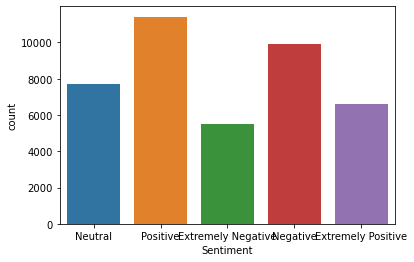

In [11]:
sns.countplot(train['Sentiment'])

Text(0.5, 1.0, 'Twitted locations')

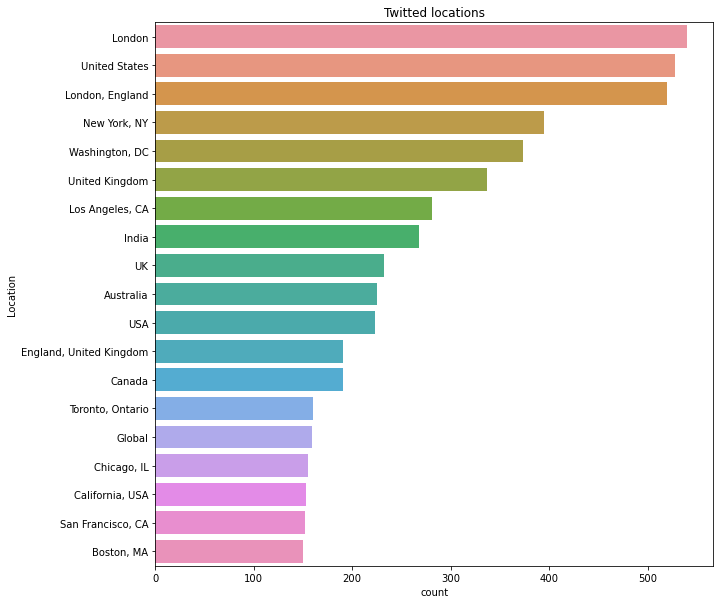

In [12]:
plt.figure(figsize=(10,10))
sns.countplot(y='Location',data=train,order=train.Location.value_counts().iloc[0:19].index).set_title("Twitted locations")

In [13]:
#Verification if there are empty fields
train.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [14]:
for column in train:
    print(f'{column} - {len(train[column].unique())}')
    print(train[column].unique())
    print()

UserName - 41157
[ 3799  3800  3801 ... 44953 44954 44955]

ScreenName - 41157
[48751 48752 48753 ... 89905 89906 89907]

Location - 12221
['London' 'UK' 'Vagabonds' ... 'Juba south sudan' 'OHIO'
 'i love you so much || he/him']

TweetAt - 30
['16-03-2020' '17-03-2020' '18-03-2020' '19-03-2020' '20-03-2020'
 '21-03-2020' '22-03-2020' '23-03-2020' '24-03-2020' '25-03-2020'
 '26-03-2020' '27-03-2020' '28-03-2020' '29-03-2020' '30-03-2020'
 '31-03-2020' '01-04-2020' '02-04-2020' '03-04-2020' '04-04-2020'
 '05-04-2020' '06-04-2020' '07-04-2020' '08-04-2020' '09-04-2020'
 '10-04-2020' '11-04-2020' '12-04-2020' '13-04-2020' '14-04-2020']

OriginalTweet - 41157
['@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8'
 'advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds b

In [15]:
'''
Conclusion. On the basis of the initial analysis, we decided that we could only use two columns for the project: "OriginalTweet" and "Sentiment".
'''

'\nConclusion. On the basis of the initial analysis, we decided that we could only use two columns for the project: "OriginalTweet" and "Sentiment".\n'

In [16]:
# We get rid of unnecessary columns
def drop(p):
    p.drop(["UserName","ScreenName","Location","TweetAt"],axis=1,inplace=True)

In [17]:
train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [18]:
drop(test)

In [19]:
drop(train)

In [20]:
train.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [21]:
#Formatting the "Sentimental" column into three categories: Positive - 2, Neutral - 1, Negative - 0

In [22]:
def zmiana(t):
        d={"Sentiment":{'Positive':2,'Negative':0,"Neutral":1,"Extremely Positive":2,"Extremely Negative":0}}
        t.replace(d,inplace=True)

In [23]:
zmiana(train)

In [24]:
train.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,1
1,advice Talk to your neighbours family to excha...,2
2,Coronavirus Australia: Woolworths to give elde...,2
3,My food stock is not the only one which is emp...,2
4,"Me, ready to go at supermarket during the #COV...",0


In [25]:
#Step 2: Data preprocessing

In [26]:
X = train['OriginalTweet']
y = train['Sentiment']

In [27]:
# Here we remove "deteriorations" from our text by replacing these contaminants with blanks
X = X.str.replace(r'http\S+', "")
X = X.str.replace(r"#\S+", "")
X = X.str.replace(r"@\S+", "")
X = X.str.replace("\r", "")
X = X.str.replace("\n", "")
X = X.str.replace(r"[^\w\s]", "")
X = X.str.lower()

# Stopwords are the words which does not add much meaning to a sentence.
def remove_stopwords(text):
    text_without_stopwords = list(filter(lambda i: i.strip() not in set(stopwords.words('english')), text.split()))
    return " ".join(text_without_stopwords)

In [28]:
# Here we apply the function created in the previous point to our tweets
X = X.apply(lambda word: remove_stopwords(word))

In [29]:
X.head()

0                                                     
1    advice talk neighbours family exchange phone n...
2    coronavirus australia woolworths give elderly ...
3    food stock one emptyplease dont panic enough f...
4    ready go supermarket outbreaknot im paranoid f...
Name: OriginalTweet, dtype: object

In [30]:
#Application of models

In [31]:
# Split dataset into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20,
                                                    random_state = 0)

In [34]:
# Convert a collection of raw documents to a matrix of TF-IDF features
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                    
                        stop_words='english')

# We transform each text into a vector
features = tfidf.fit_transform(X).toarray()

labels = y

In [35]:
# In this step we create and teach our models. As I mentioned at the beginning, I chose 3 methods that we intend to use in this step.
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
]

# Cross-validation 
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [36]:
# Compare our models in terms of accuracy
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.801176,0.005448
MultinomialNB,0.662147,0.004337
RandomForestClassifier,0.474864,0.009560


In [37]:
#As we can see LinearSVC works best, accuracy under 80%
X_train, X_test, y_train, y_test, indices_train, indices_test  = train_test_split(features, 
                                                               labels, 
                                                               train.index, test_size=0.20, 
                                                               random_state=1)
model =   LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [38]:
#We compare the metrics: precision, recall and f1-score. Precison = True Positive / (True Positive + False Positive), Recall = True Positive / (True Positive + False Negative), f1-score =  2 * (Precision * Recall) / (Precision + Recall).
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      3091
           1       0.70      0.69      0.69      1554
           2       0.83      0.84      0.83      3587

    accuracy                           0.80      8232
   macro avg       0.78      0.78      0.78      8232
weighted avg       0.80      0.80      0.80      8232



In [39]:
'''Summary. The best method of sentimental prediction of tweets among the methods of machine learning turned out to be LinearSVC, 
the second one was a Naive Bayes, RandomForestClassifier came in third.''' 

'Summary. The best method of sentimental prediction of tweets among the methods of machine learning turned out to be LinearSVC, \nthe second one was a Naive Bayes, RandomForestClassifier came in third.'